# Doing stats on the tagged data from the dashboard

This script written by **Shah Nafis Rafique** will attempt to find out any meaningful information from the tagged data that is made from the dashboard

Import the imports

In [17]:
import pandas as pd
import jsonpickle
import numpy as np
import matplotlib.pyplot as plt
import os, os.path

In [19]:
FILE_AS_ROOT = True
FILE_TO_ROOT = '../../../../../../'
JSON_FILE_TO_IMPORT = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_data_personal.json" 
SCRIPT_PATH = "./src/python/psic/stats/tagging_stats"
FILE_TO_TAG_RATIO = f"{'./' if FILE_AS_ROOT else './src/python/psic/stats/tagging_stats'}tag_ratio.csv"
TAGGING_STATES_FOLDER = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_json_states"

Used to get a pickgle at a specified path.

In [20]:
def get_pickle(path_to_file):
    with open(JSON_FILE_TO_IMPORT, 'r') as f:
        return jsonpickle.decode(f.read())

Function to display some information about the json pickle file.

In [21]:
def how_many_taggged(pickle_file):
    done_tagging_count=len(pickle_file.finished_tagged_queue)

    tagged_but_not_done_count=0
    for image in pickle_file.pending_images_queue:
        if len(image.get_taggers()) > 0:
            tagged_but_not_done_count-=-1

    print(f"{tagged_but_not_done_count} images have been tagged, but not completely")
    print(f"{done_tagging_count} images have been tagged completely")
    print(f"{tagged_but_not_done_count+done_tagging_count} images have been tagged, completely or not")
    
    sales = [{'not_done':tagged_but_not_done_count,'done_tagging_count':done_tagging_count}]
    pd.DataFrame

Get the json pickle

In [22]:
data = get_pickle(JSON_FILE_TO_IMPORT)

View the tagged ratio log

In [23]:
tag_ratio_data = pd.read_csv(FILE_TO_TAG_RATIO)
tag_ratio_data = tag_ratio_data.sort_values(by="time")
tag_ratio_data.head()

,not_done,done,time
0,73,184,1573667040
1,117,248,1573965434


Add a column to show not completed vs total tagged images

In [24]:
tag_ratio_data['completed_tag_ratio']=tag_ratio_data[['not_done']].iloc[:,0].divide(tag_ratio_data[['not_done','done']].sum(axis=1))
tag_ratio_data.head()

,not_done,done,time,completed_tag_ratio
0,73,184,1573667040,0.284047
1,117,248,1573965434,0.320548


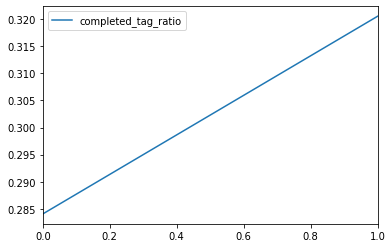

In [25]:
tag_ratio_data[['completed_tag_ratio']].plot.line()

In [46]:
print (len([name for name in os.listdir(TAGGING_STATES_FOLDER) if os.path.isfile(os.path.join(TAGGING_STATES_FOLDER, name))]))

892


In [48]:
path = os.getcwd()
files = os.listdir("/home/namenai/Documents/GitKraken/tagging_json_states")
files_json = [f for f in files if f[-4:] == 'json']
files_json

['assigner_state-root-2019-11-13T20:30:23.943534.json',
 'assigner_state-root-2019-11-12T18:11:39.840619.json',
 'assigner_state-root-2019-11-12T18:09:05.295313.json',
 'assigner_state-root-2019-11-13T20:30:05.885300.json',
 'assigner_state-root-2019-11-12T06:45:57.281233.json',
 'assigner_state-root-2019-11-12T15:09:02.735196.json',
 'assigner_state-root-2019-11-13T21:10:11.422192.json',
 'assigner_state-root-2019-11-13T20:28:55.144308.json',
 'assigner_state-root-2019-11-12T06:44:27.589312.json',
 'assigner_state-root-2019-11-13T16:44:12.280941.json',
 'assigner_state-root-2019-11-12T18:42:16.320327.json',
 'assigner_state-root-2019-11-13T21:15:40.071135.json',
 'assigner_state-root-2019-11-11T20:23:23.958976.json',
 'assigner_state-root-2019-11-12T18:07:36.181323.json',
 'assigner_state-root-2019-11-12T19:59:39.127805.json',
 'assigner_state-root-2019-11-12T21:55:14.207613.json',
 'assigner_state-root-2019-11-13T21:12:04.200369.json',
 'assigner_state-root-2019-11-12T18:03:34.223795